In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

In [3]:
df = pd.read_csv("train.csv")
df.head()

pm10   pm25     co     hc     o3   no2    so2            kategori
0   65.59  16.62  15.59   0.05  10.50  6.99   4.17         TIDAK SEHAT
1   14.17   3.21  19.65   0.05  13.05  6.99   4.17                BAIK
2    4.81   3.13  18.93   0.05  13.40  6.99   4.17                BAIK
3  185.81  27.15  20.36  35.53  48.31  9.94  19.37  SANGAT TIDAK SEHAT
4   37.22  10.01  20.80   0.05  12.54  6.99   4.17              SEDANG

In [3]:
df.shape

(372, 8)

In [4]:
df.isnull().sum()

pm10        0
pm25        0
co          0
hc          0
o3          0
no2         0
so2         0
kategori    0
dtype: int64

In [5]:
df['kategori'].value_counts()

kategori
BAIK                  162
TIDAK SEHAT           103
SEDANG                 68
SANGAT TIDAK SEHAT     33
BERBAHAYA               6
Name: count, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372 entries, 0 to 371
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pm10      372 non-null    float64
 1   pm25      372 non-null    float64
 2   co        372 non-null    float64
 3   hc        372 non-null    float64
 4   o3        372 non-null    float64
 5   no2       372 non-null    float64
 6   so2       372 non-null    float64
 7   kategori  372 non-null    object 
dtypes: float64(7), object(1)
memory usage: 23.4+ KB


In [7]:
df.describe()

pm10        pm25           co          hc          o3  \
count  372.000000  372.000000   372.000000  372.000000  372.000000   
mean    50.627422   11.960429   208.549313   40.302061   22.378823   
std     68.804261   19.188310   260.892950   56.559531   12.623128   
min      0.000000    0.000000     0.705980    0.045761    0.051787   
25%      2.682500    2.340675    37.037691    2.580640   17.385000   
50%     13.210000    5.155000   131.520000    4.235000   21.675000   
75%     77.180000   12.685000   246.990000   70.137500   26.570000   
max    290.800000  119.100000  1586.970000  174.900000  113.380000   

              no2         so2  
count  372.000000  372.000000  
mean     6.823007    5.011888  
std      3.253119    5.057836  
min      0.044879    0.010149  
25%      4.050000    2.470000  
50%      6.990000    4.170000  
75%      9.940000    4.230000  
max     10.700000   19.370000

In [8]:
X = df.drop("kategori", axis=1)
y = df["kategori"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train: {X_train.shape}")
print(f"X_test: {X_test.shape}")
print(f"y_train: {y_train.shape}")
print(f"y_test: {y_test.shape}")

X_train: (297, 7)
X_test: (75, 7)
y_train: (297,)
y_test: (75,)


In [ ]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

df = pd.read_csv("train.csv")

df["PM10_PM25_ratio"] = df["pm10"] / (df["pm25"] + 1)
df["PM10_SO2_ratio"] = df["pm10"] / (df["so2"] + 1)
df["PM2.5_SO2_ratio"] = df["pm25"] / (df["so2"] + 1)
df["CO_NO2_ratio"] = df["co"] / (df["no2"] + 1)
df["CO_SO2_ratio"] = df["co"] / (df["so2"] + 1)
df["CO_O3_ratio"] = df["co"] / (df["o3"] + 1)
df["SO2_NO2_ratio"] = df["so2"] / (df["no2"] + 1)
df["SO2_O3_ratio"] = df["so2"] / (df["o3"] + 1)
df["NO2_O3_ratio"] = df["no2"] / (df["o3"] + 1)
df["HC_CO_ratio"] = df["hc"] / (df["co"] + 1)
df["HC_NO2_ratio"] = df["hc"] / (df["no2"] + 1)
df["HC_SO2_ratio"] = df["hc"] / (df["so2"] + 1)
df["HC_O3_ratio"] = df["hc"] / (df["o3"] + 1)
df["total_pollution"] = df[["pm10", "pm25", "co", "no2", "so2", "o3", "hc"]].sum(axis=1)

X = df[["pm10", "pm25", "co", "no2", "so2", "o3", "hc",
        "PM10_PM25_ratio", "PM10_SO2_ratio", "PM2.5_SO2_ratio",
        "CO_NO2_ratio", "CO_SO2_ratio", "CO_O3_ratio",
        "SO2_NO2_ratio", "SO2_O3_ratio", "NO2_O3_ratio",
        "HC_CO_ratio", "HC_NO2_ratio", "HC_SO2_ratio", "HC_O3_ratio",
        "total_pollution"]]
y = df["kategori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {round(grid_search.best_score_ * 100, 2)}%")
print(f"Test Accuracy: {round(best_model.score(X_test, y_test) * 100, 2)}%")

joblib.dump(best_model, "svmreat_rbf.pkl")


Best Parameters: {'svc__C': 100, 'svc__gamma': 0.01}
Best Score: 93.94%
Test Accuracy: 93.33%


['svmreat_rbf.pkl']

: 

In [12]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svc', SVC(kernel='linear'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1,  100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {round(grid_search.best_score_*100, 2)}%")

best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {round(accuracy*100, 2)}%")

Best Parameters: {'svc__C': 100, 'svc__gamma': 1}
Best Score: 93.27%
Test Accuracy: 93.33%


In [14]:
# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svc', SVC(kernel='poly'))
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {round(grid_search.best_score_*100, 2)}%")

# Evaluate the best model on the testing data
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy: {round(accuracy*100, 2)}%")

Best Parameters: {'svc__C': 1, 'svc__gamma': 1}
Best Score: 91.58%
Test Accuracy: 93.33%


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

# Create a pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardize features
    ('svc', SVC(kernel='rbf'))     # Use SVC with RBF kernel
])

# Define the parameter grid for GridSearchCV
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

# Create GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', return_train_score=True)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Print all tested parameter combinations with their scores
print("Hasil Evaluasi Semua Kombinasi Parameter:")
print("--------------------------------------------------")
print("C\tGamma\tBest Score (CV)\tTest Accuracy")
print("--------------------------------------------------")

# Loop melalui semua hasil kombinasi parameter
for i in range(len(grid_search.cv_results_['params'])):
    C_value = grid_search.cv_results_['params'][i]['svc__C']
    gamma_value = grid_search.cv_results_['params'][i]['svc__gamma']
    best_score = round(grid_search.cv_results_['mean_test_score'][i] * 100, 2)  # Mean cross-validation score
    best_model = grid_search.best_estimator_
    test_accuracy = round(best_model.score(X_test, y_test) * 100, 2)  # Evaluate on test data
    
    print(f"{C_value}\t{gamma_value}\t{best_score}%\t\t{test_accuracy}%")

# Print the best parameters found
print("\nBest Parameters:", grid_search.best_params_)
print(f"Best Score: {round(grid_search.best_score_*100, 2)}%")

# Evaluate the best model on the test data
best_model = grid_search.best_estimator_
accuracy = best_model.score(X_test, y_test)
print(f"Test Accuracy of Best Model: {round(accuracy*100, 2)}%")


Hasil Evaluasi Semua Kombinasi Parameter:
--------------------------------------------------
C	Gamma	Best Score (CV)	Test Accuracy
--------------------------------------------------
0.1	1	72.39%		94.67%
0.1	0.1	71.72%		94.67%
0.1	0.01	43.77%		94.67%
0.1	0.001	43.77%		94.67%
1	1	91.92%		94.67%
1	0.1	87.88%		94.67%
1	0.01	74.41%		94.67%
1	0.001	43.77%		94.67%
10	1	92.93%		94.67%
10	0.1	92.93%		94.67%
10	0.01	89.56%		94.67%
10	0.001	74.75%		94.67%
100	1	92.93%		94.67%
100	0.1	94.28%		94.67%
100	0.01	94.28%		94.67%
100	0.001	88.22%		94.67%

Best Parameters: {'svc__C': 100, 'svc__gamma': 0.1}
Best Score: 94.28%
Test Accuracy of Best Model: 94.67%


: 

In [15]:
import pandas as pd
import numpy as np
import joblib
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

df = pd.read_csv("train.csv")

df["PM10_PM25_ratio"] = df["pm10"] / (df["pm25"] + 1)
df["PM10_SO2_ratio"] = df["pm10"] / (df["so2"] + 1)
df["PM2.5_SO2_ratio"] = df["pm25"] / (df["so2"] + 1)
df["CO_NO2_ratio"] = df["co"] / (df["no2"] + 1)
df["CO_SO2_ratio"] = df["co"] / (df["so2"] + 1)
df["CO_O3_ratio"] = df["co"] / (df["o3"] + 1)
df["SO2_NO2_ratio"] = df["so2"] / (df["no2"] + 1)
df["SO2_O3_ratio"] = df["so2"] / (df["o3"] + 1)
df["NO2_O3_ratio"] = df["no2"] / (df["o3"] + 1)
df["HC_CO_ratio"] = df["hc"] / (df["co"] + 1)
df["HC_NO2_ratio"] = df["hc"] / (df["no2"] + 1)
df["HC_SO2_ratio"] = df["hc"] / (df["so2"] + 1)
df["HC_O3_ratio"] = df["hc"] / (df["o3"] + 1)
df["total_pollution"] = df[["pm10", "pm25", "co", "no2", "so2", "o3", "hc"]].sum(axis=1)

X = df[["pm10", "pm25", "co", "no2", "so2", "o3", "hc",
        "PM10_PM25_ratio", "PM10_SO2_ratio", "PM2.5_SO2_ratio",
        "CO_NO2_ratio", "CO_SO2_ratio", "CO_O3_ratio",
        "SO2_NO2_ratio", "SO2_O3_ratio", "NO2_O3_ratio",
        "HC_CO_ratio", "HC_NO2_ratio", "HC_SO2_ratio", "HC_O3_ratio",
        "total_pollution"]]
y = df["kategori"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)
print(f"Best Score: {round(grid_search.best_score_ * 100, 2)}%")
print(f"Test Accuracy: {round(best_model.score(X_test, y_test) * 100, 2)}%")

joblib.dump(best_model, "svmreat_rbf.pkl")

Best Parameters: {'svc__C': 100, 'svc__gamma': 0.1}
Best Score: 94.28%
Test Accuracy: 94.67%


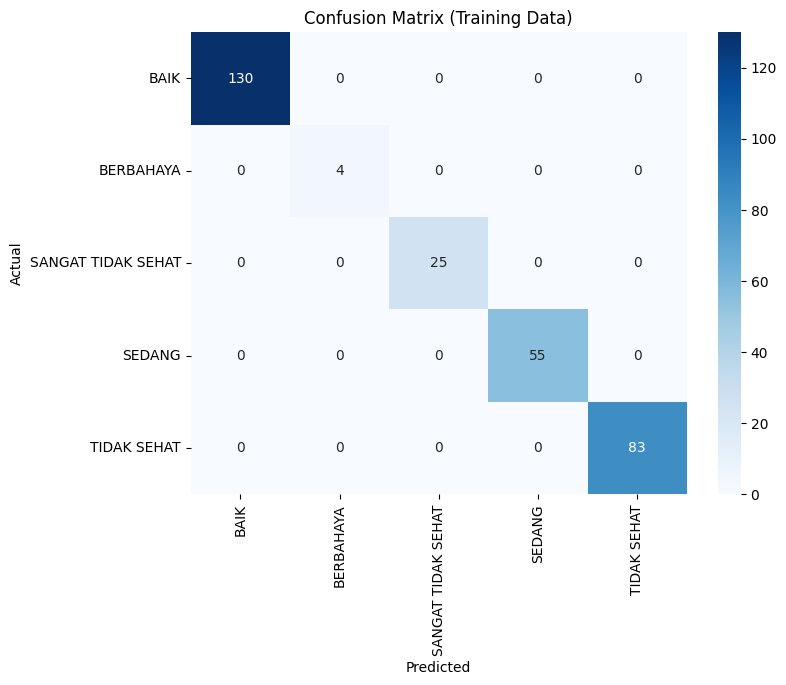

In [16]:
# Predict on the training set
y_train_pred = best_model.predict(X_train)

# Generate and plot the confusion matrix for the training data
cm_train = confusion_matrix(y_train, y_train_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (Training Data)")
plt.show()

                    precision    recall  f1-score   support

              BAIK       0.97      1.00      0.98        32
         BERBAHAYA       1.00      1.00      1.00         2
SANGAT TIDAK SEHAT       1.00      0.75      0.86         8
            SEDANG       1.00      0.85      0.92        13
       TIDAK SEHAT       0.87      1.00      0.93        20

          accuracy                           0.95        75
         macro avg       0.97      0.92      0.94        75
      weighted avg       0.95      0.95      0.95        75



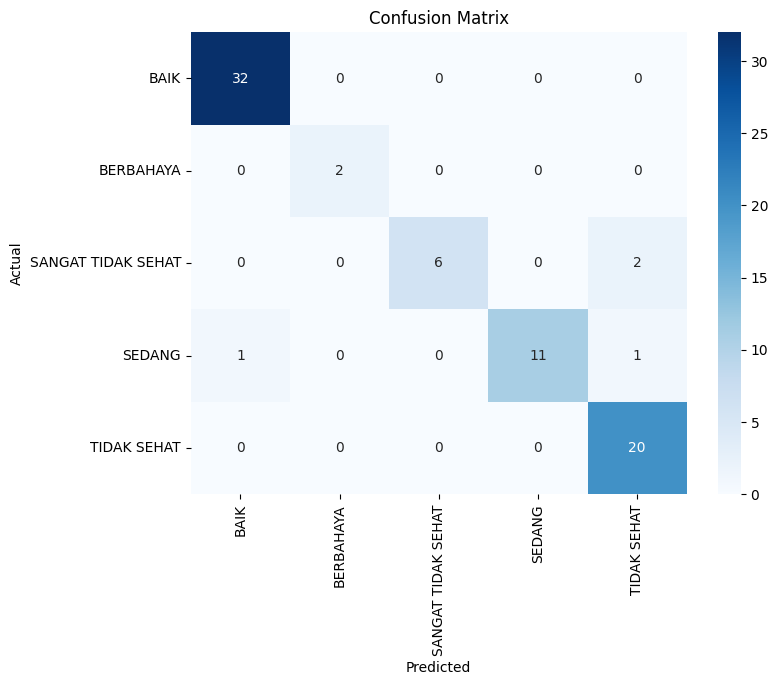

In [17]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Generate the classification report
print(classification_report(y_test, y_pred))

# Generate and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=grid_search.classes_, yticklabels=grid_search.classes_)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [5]:
# Load the dataset
df = pd.read_csv("train.csv")

# Prepare the data
X = df.drop("kategori", axis=1)
y = df["kategori"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline (same as before)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

# Replace parameters with best params
best_params = {'svc__C': 10, 'svc__gamma': 0.1}
param_grid = {
    'svc__C': [best_params['svc__C']],
    'svc__gamma': [best_params['svc__gamma']]
}


# Create and fit the model with the best parameters
retrained_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=best_params['svc__C'], gamma=best_params['svc__gamma']))
])

retrained_model.fit(X_train, y_train)


# Evaluate the retrained model
accuracy = retrained_model.score(X_test, y_test)
print(f"Retrained Model Test Accuracy: {round(accuracy*100, 2)}%")

# Save the retrained model
joblib.dump(retrained_model, 'svc_rbf.pkl')

print("Model saved as svc_rbf.pkl")

Retrained Model Test Accuracy: 94.67%
Model saved as svc_rbf.pkl


In [13]:
# Load the dataset
df = pd.read_csv("train.csv")

# Prepare the data
X = df.drop("kategori", axis=1)
y = df["kategori"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline (same as before)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf'))
])

# Replace parameters with best params
best_params = {'svc__C': 100, 'svc__gamma': 0.1}
param_grid = {
    'svc__C': [0.1, 1, 10, 100],
    'svc__gamma': [1, 0.1, 0.01, 0.001]
}


# Create and fit the model with the best parameters
retrained_model = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(kernel='rbf', C=best_params['svc__C'], gamma=best_params['svc__gamma']))
])

retrained_model.fit(X_train, y_train)

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
# Evaluate the retrained model
accuracy = retrained_model.score(X_test, y_test)
print(f"Retrained Model Test Accuracy: {round(accuracy*100, 2)}%")
print(f"Best Score: {round(grid_search.best_score_*100, 2)}%")
# Save the retrained model
joblib.dump(retrained_model, 'svc_rbf.pkl')

print("Model saved as svc_rbf.pkl")

Best Parameters: {'svc__C': 100, 'svc__gamma': 0.1}
Retrained Model Test Accuracy: 94.67%
Best Score: 94.28%
Model saved as svc_rbf.pkl
